

 # AR_MODEL

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- importando os dados dos crimes sexuais

In [2]:
crimes_sexuais = pd.read_csv('crimes_sexuais.csv')

In [3]:
crimes_sexuais.head()

,data_da_ocorrencia,crimes_sexuais
0,2014-01-01,43
1,2014-01-02,5
2,2014-01-03,3
3,2014-01-04,3
4,2014-01-05,8


 - convertendo as coluna data para Datetime

In [4]:
crimes_sexuais['data_da_ocorrencia'] = pd.to_datetime(crimes_sexuais['data_da_ocorrencia'])

 - Selecionando apenas os delitos concluídos nos anos 2014 e 2015

In [5]:
crimes_sexuais = crimes_sexuais.query(' data_da_ocorrencia >= "2014-01-01"')

In [6]:
crimes_sexuais['data_da_ocorrencia'].dt.year.value_counts()

2015    365
2014    365
Name: data_da_ocorrencia, dtype: int64

 - Definindo a data como índice

In [7]:
crimes_sexuais = crimes_sexuais.set_index('data_da_ocorrencia')

 - Graficando "crimes_sexuais"

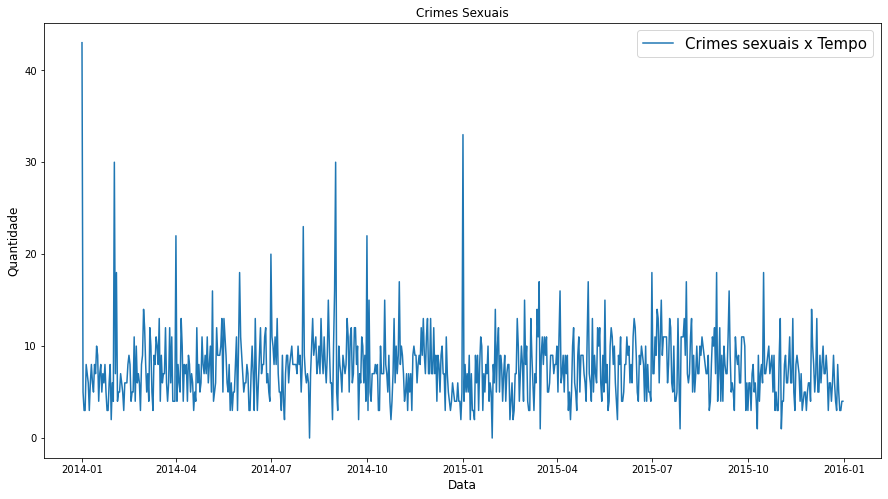

In [8]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

## Fazendo a decomposição sazonal

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
resultado = seasonal_decompose(crimes_sexuais, period=12)

 - obtendo os componentes

In [11]:
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid

Text(0.5, 1.0, 'Tendencia')

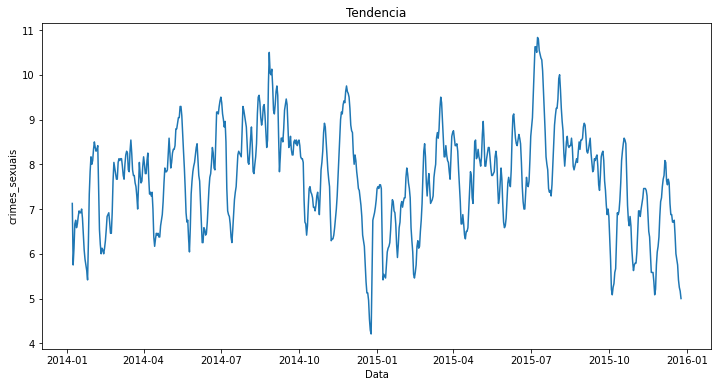

In [12]:
plt.figure(figsize=(12,6))
plt.plot(tendencia)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Tendencia')

Text(0.5, 1.0, 'Sazonalidade')

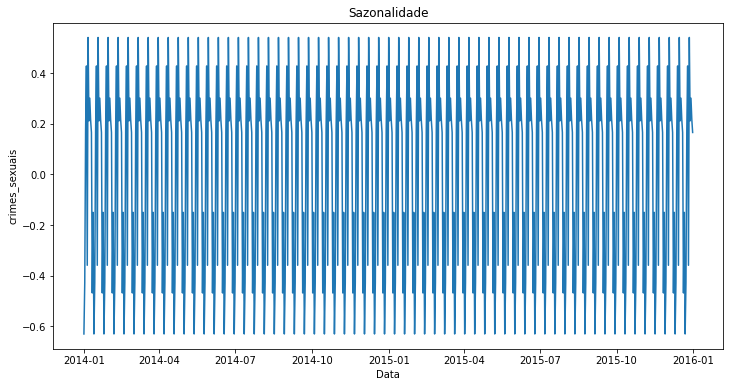

In [13]:
plt.figure(figsize=(12,6))
plt.plot(sazonalidade)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Sazonalidade')

Text(0.5, 1.0, 'Resíduo')

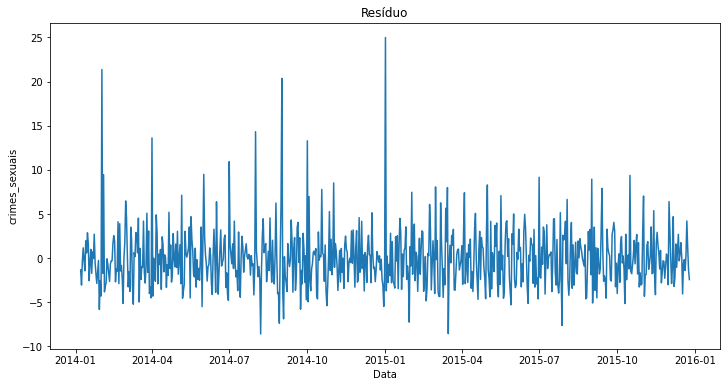

In [14]:
plt.figure(figsize=(12,6))
plt.plot(residuo)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Resíduo')


## Graficando  autocorrelação

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

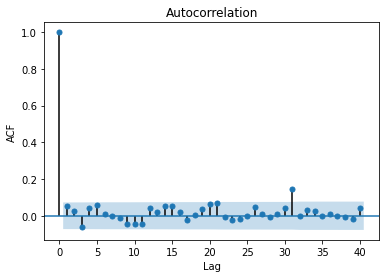

In [16]:
plot_acf(crimes_sexuais.values,lags=40)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

 - alterando o range

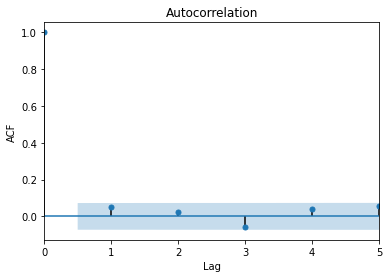

In [17]:
plot_acf(crimes_sexuais.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.xlim([0,5])
plt.show()

 - ACF tem Lag igual a 1

## Graficando autocorrelação parcial

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

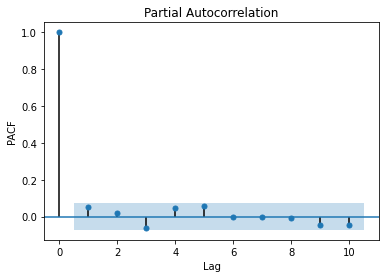

In [19]:
plot_pacf(crimes_sexuais.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

 - Alterando o range

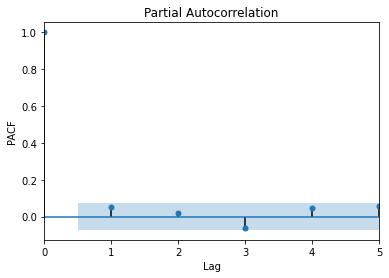

In [20]:
plot_pacf(crimes_sexuais.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.xlim([0,5])
plt.show()

 -  PACF tem lag igual a 1.


 - Lag Plot

In [21]:
from pandas.plotting import lag_plot

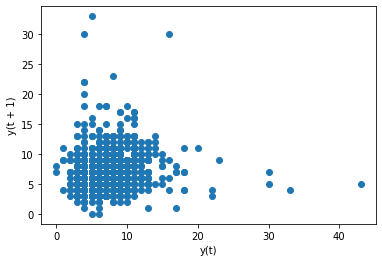

In [22]:
lag_plot(crimes_sexuais)

 ## Aplicando o Modelo AutoRegressivo

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
t_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].index.values
t_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].index.values
X_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].values
X_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].values

- aplicando o modelo auto regressivo

In [25]:
from statsmodels.tsa.ar_model import AutoReg

In [26]:
modelo = AutoReg(X_treino, 1)
resultado = modelo.fit()
print(resultado.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  516
Model:                     AutoReg(1)   Log Likelihood               -1416.706
Method:               Conditional MLE   S.D. of innovations              3.788
Date:                Tue, 08 Dec 2020   AIC                              2.676
Time:                        16:13:06   BIC                              2.700
Sample:                             1   HQIC                             2.685
                                  516                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.4917      0.356     21.059      0.000       6.794       8.189
y.L1           0.0193      0.041      0.475      0.635      -0.061       0.099
                                    Roots           

 - Coeficientes

In [27]:
print('Coefficients: %s' % resultado.params)

Coefficients: [7.49171271 0.01933702]


 - AIC

In [28]:
AIC = resultado.aic

In [29]:
print('AIC = {:0.2f}'.format(AIC))

AIC = 2.68


 - Fazendo as predições

In [30]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

 - Calculando erros

(array([735234., 735324., 735415., 735507., 735599., 735689., 735780.,
        735872., 735964.]),
 <a list of 9 Text major ticklabel objects>)

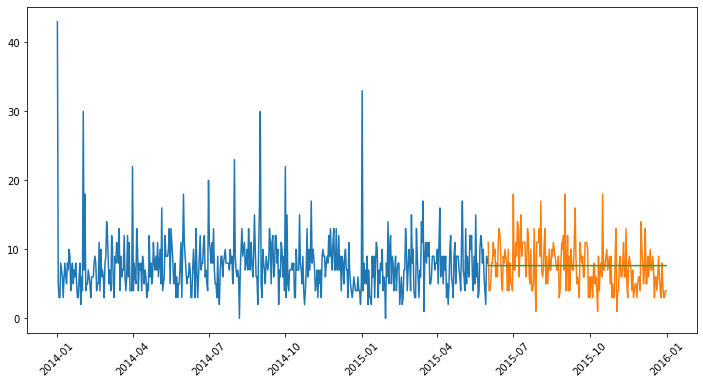

In [31]:
plt.figure(figsize=(12,6))
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)
plt.xticks(rotation=45)

 - calculando erros

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
MSE = mean_squared_error(X_teste,X_pred)

In [34]:
RMSE = np.sqrt(MSE)

In [35]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.27


 - Grid search

In [36]:
for i in range(1,20):
    modelo = AutoReg(X_treino, i)
    resultado = modelo.fit()
    AIC = resultado.aic
    X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)
    MSE = mean_squared_error(X_teste,X_pred)
    RMSE = np.sqrt(MSE)
    print("i = {} AIC = {:0.2f} RMSE = {:0.4f}".format(i, AIC,RMSE))

i = 1 AIC = 2.68 RMSE = 3.2739
i = 2 AIC = 2.68 RMSE = 3.2739
i = 3 AIC = 2.67 RMSE = 3.2703
i = 4 AIC = 2.67 RMSE = 3.2701
i = 5 AIC = 2.68 RMSE = 3.2689
i = 6 AIC = 2.68 RMSE = 3.2692
i = 7 AIC = 2.69 RMSE = 3.2688
i = 8 AIC = 2.69 RMSE = 3.2702
i = 9 AIC = 2.69 RMSE = 3.2695
i = 10 AIC = 2.69 RMSE = 3.2679
i = 11 AIC = 2.70 RMSE = 3.2627
i = 12 AIC = 2.70 RMSE = 3.2650
i = 13 AIC = 2.71 RMSE = 3.2650
i = 14 AIC = 2.71 RMSE = 3.2603
i = 15 AIC = 2.71 RMSE = 3.2541
i = 16 AIC = 2.72 RMSE = 3.2540
i = 17 AIC = 2.72 RMSE = 3.2548
i = 18 AIC = 2.73 RMSE = 3.2557
i = 19 AIC = 2.73 RMSE = 3.2583


 - Índice igual a 16 aprensentou melhor resultado

In [37]:
modelo = AutoReg(X_treino, 16)
resultado = modelo.fit()
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

(array([735234., 735324., 735415., 735507., 735599., 735689., 735780.,
        735872., 735964.]),
 <a list of 9 Text major ticklabel objects>)

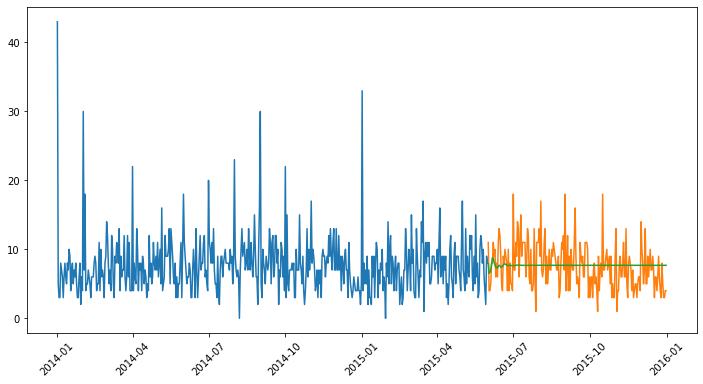

In [38]:
plt.figure(figsize=(12,6))
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)
plt.xticks(rotation=45)